<a href="https://colab.research.google.com/github/rlaaudrb1104/Ai/blob/KMG/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

raw_data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
raw_data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv')

In [2]:
train = raw_data_train.copy()
test = raw_data_test.copy()

In [3]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
import numpy as np
np.random.seed(0)
survived = np.random.randint(0,2, size=len(submission['Survived']))
print(survived)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1
 1 1 0 1 1 1 0 0 1 1 0]


In [8]:
mean_age = train['Age'].mean()
mean_fare = train['Fare'].mean()

train['Age'] = train['Age'].fillna(mean_age)
train['Fare'] = train['Fare'].fillna(mean_fare)


In [9]:
train_x = train.drop(columns = 'Survived')
train_y = train['Survived']

from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.2, random_state = 0)



In [10]:
import statsmodels.api as sm
train_dataset = pd.concat([train_x, train_y], axis = 1)

formula = """
					Survived ~ Age + SibSp + Parch + Fare
					"""
model = sm.Logit.from_formula(formula, data = train_dataset)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.616842
         Iterations 6


In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                 0.07342
Time:                        07:07:48   Log-Likelihood:                -439.19
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 2.760e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0725      0.223     -0.325      0.745      -0.510       0.365
Age           -0.0267      0.007     -3.901      0.000      -0.040      -0.013
SibSp         -0.3311      0.094     -3.534      0.000      -0.515      -0.147
Parch          0.1272      0.109      1.163      0.245      -0.087       0.342
Fare           0.0168      0.003      5.794      0.000       0.011       0.023
==============================================================================
"""

In [12]:
y_pred = result.predict(val_x)
y_pred = y_pred.apply(lambda x : 1 if x >= 0.5 else 0)

In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_y, y_pred))

[[105   5]
 [ 43  26]]


In [14]:
from sklearn.metrics import classification_report
print(classification_report(val_y, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       110
           1       0.84      0.38      0.52        69

    accuracy                           0.73       179
   macro avg       0.77      0.67      0.67       179
weighted avg       0.76      0.73      0.70       179



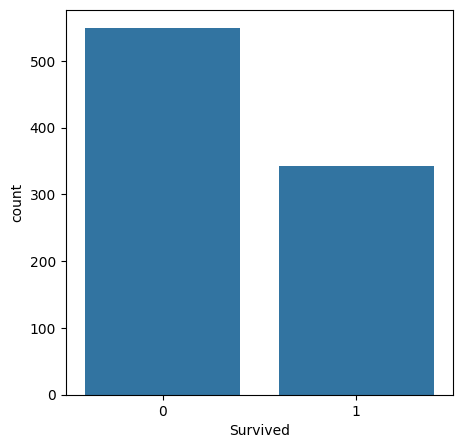

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (5,5))
sns.countplot(x=raw_data_train['Survived'])
plt.show()

<ipython-input-16-ed6dd5841794>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=raw_data_train[col_name], palette='Set2', ax=ax[0]).set(title=col_name+' count plot')
<ipython-input-16-ed6dd5841794>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=raw_data_train, x=col_name, y="Survived", palette='Set2', ax=ax[1]).set(title=col_name+' bar chart')


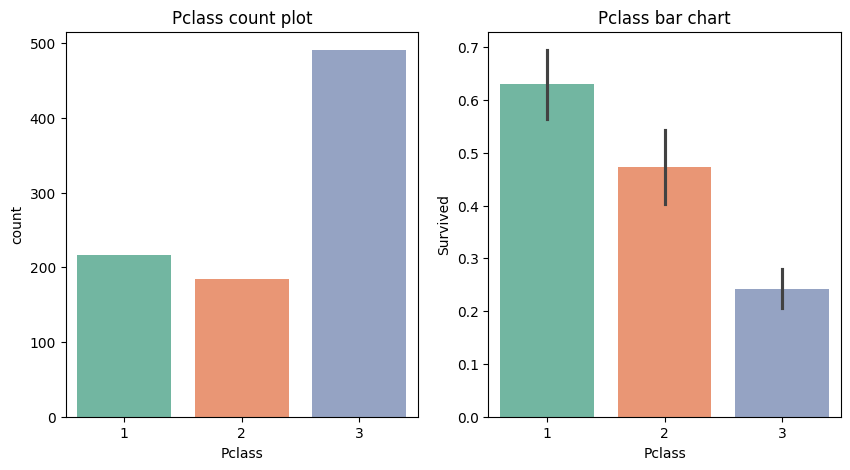

<ipython-input-16-ed6dd5841794>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=raw_data_train[col_name], palette='Set2', ax=ax[0]).set(title=col_name+' count plot')
<ipython-input-16-ed6dd5841794>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=raw_data_train, x=col_name, y="Survived", palette='Set2', ax=ax[1]).set(title=col_name+' bar chart')


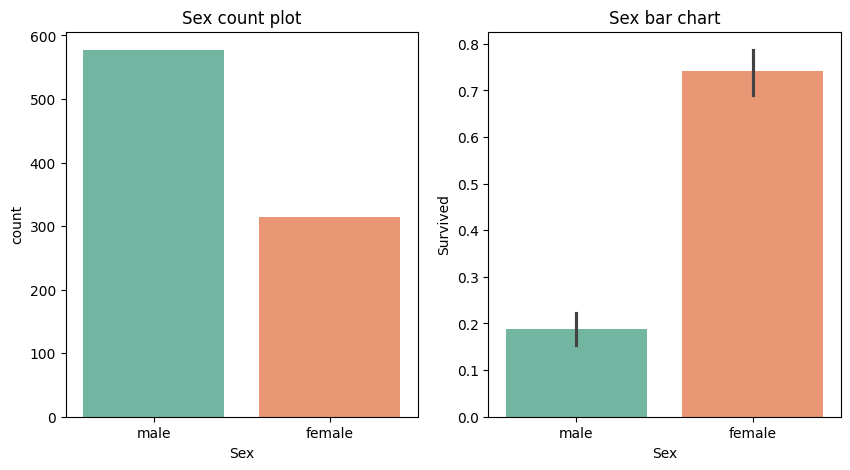

<ipython-input-16-ed6dd5841794>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=raw_data_train[col_name], palette='Set2', ax=ax[0]).set(title=col_name+' count plot')
<ipython-input-16-ed6dd5841794>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=raw_data_train, x=col_name, y="Survived", palette='Set2', ax=ax[1]).set(title=col_name+' bar chart')


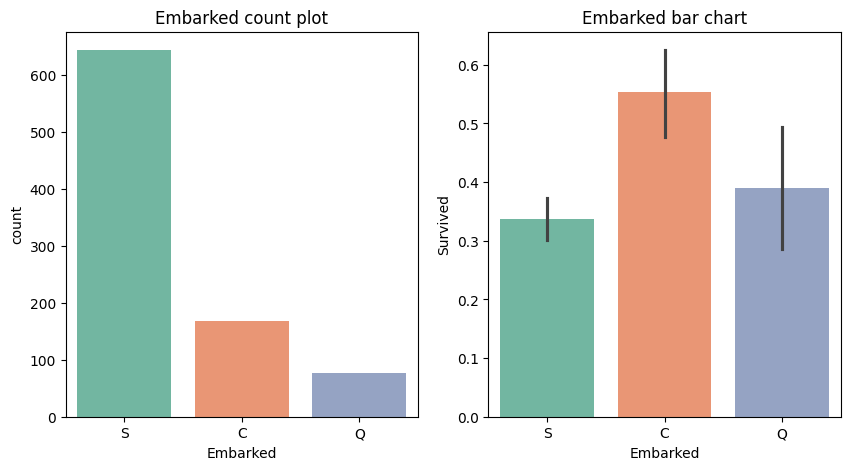

In [16]:
columns = ['Pclass', 'Sex', 'Embarked']
for col_name in columns:
    fig, ax = plt.subplots(ncols=2, figsize=(10,5))
    sns.countplot(x=raw_data_train[col_name], palette='Set2', ax=ax[0]).set(title=col_name+' count plot')
    sns.barplot(data=raw_data_train, x=col_name, y="Survived", palette='Set2', ax=ax[1]).set(title=col_name+' bar chart')
    plt.show()

<ipython-input-17-e64f894a6481>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = raw_data_train[col_name], ax = ax[0], palette = 'Set2')
<ipython-input-17-e64f894a6481>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = raw_data_train, x = col_name, y = "Survived_str", ax = ax[1],palette = 'Set2')


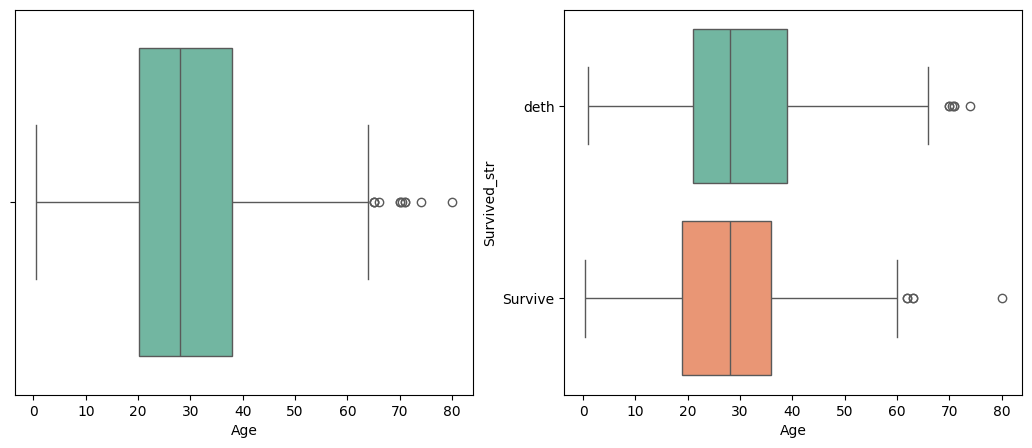

<ipython-input-17-e64f894a6481>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = raw_data_train[col_name], ax = ax[0], palette = 'Set2')
<ipython-input-17-e64f894a6481>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = raw_data_train, x = col_name, y = "Survived_str", ax = ax[1],palette = 'Set2')


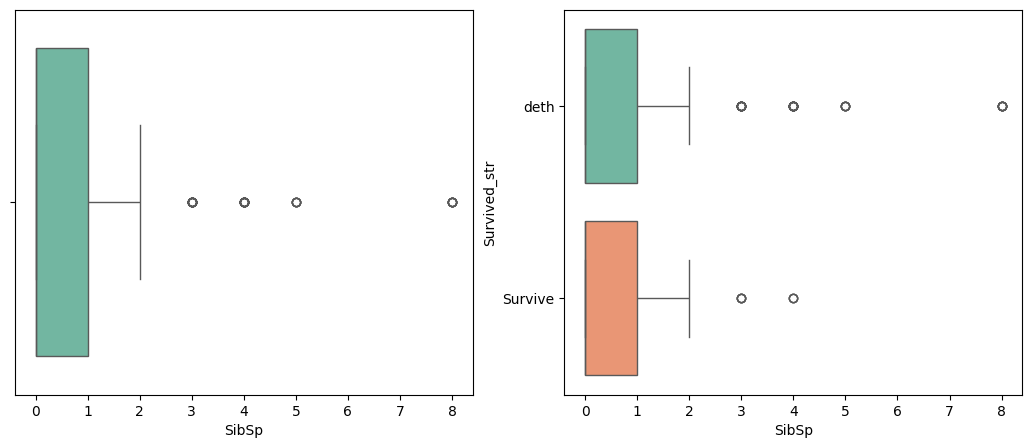

<ipython-input-17-e64f894a6481>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = raw_data_train[col_name], ax = ax[0], palette = 'Set2')
<ipython-input-17-e64f894a6481>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = raw_data_train, x = col_name, y = "Survived_str", ax = ax[1],palette = 'Set2')


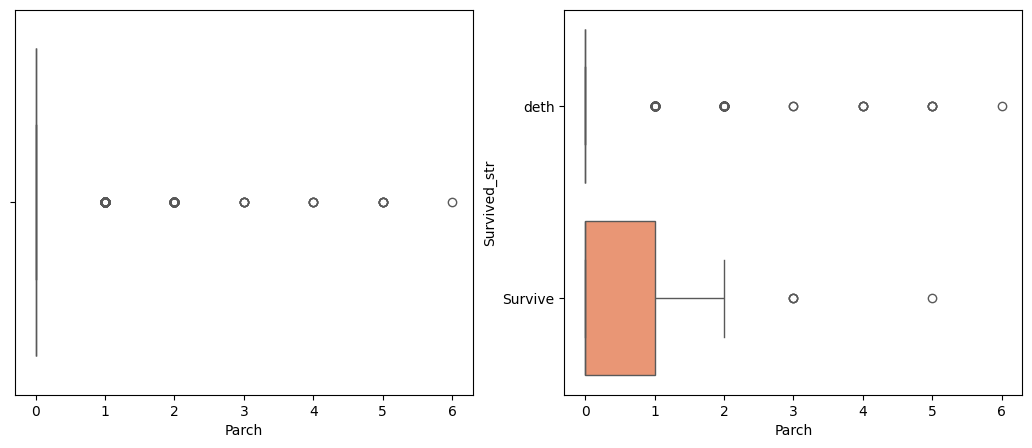

<ipython-input-17-e64f894a6481>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = raw_data_train[col_name], ax = ax[0], palette = 'Set2')
<ipython-input-17-e64f894a6481>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = raw_data_train, x = col_name, y = "Survived_str", ax = ax[1],palette = 'Set2')


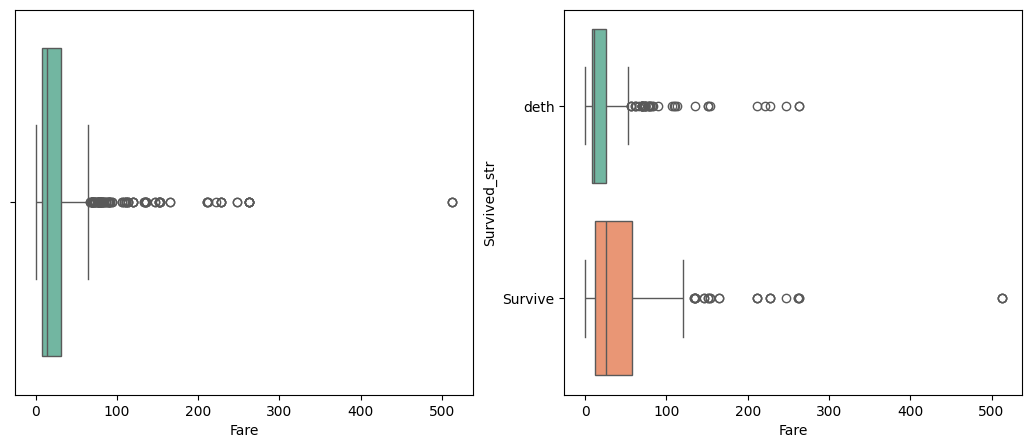

In [17]:
raw_data_train['Survived_str'] = raw_data_train['Survived'].apply(
    lambda x : 'deth' if x == 0 else 'Survive'
)
columns = ['Age', 'SibSp', 'Parch', 'Fare']
for col_name in columns :
  fig, ax = plt.subplots(ncols = 2, figsize = (13,5))
  sns.boxplot(x = raw_data_train[col_name], ax = ax[0], palette = 'Set2')
  sns.boxplot(data = raw_data_train, x = col_name, y = "Survived_str", ax = ax[1],palette = 'Set2')
  plt.show()